<div class="alert alert-block alert-info">
<img src="./Imagenes/ITESO_Logo.png" style="width:500px;height:142px;" title="Logo ITESO">
<br><font face = "Times New Roman" size = "6"><b><center>Maestría en Sistemas Computacionales</center></b></font>
<br><font face = "Times New Roman" size = "5"><b><center>Programación para Análisis de Datos</center></b></font>

<b><br><font face = "Times New Roman" size = "4"><center>Unidad 5: Proceso de Selección de Métodos</center></font>
<font face = "Times New Roman" size = "4"><center>Tema 5.3: Modelo K-Nearest Neighbor (k-NN)</center></font>
</div>

## Modelo k-NEAREST NEIGHBOR (k-NN)

El modelo **k-Nearest Neighbor (k-NN)** es un algoritmo de tipo supervisado de **Aprendizaje Automático (Machine Learning)**. Puede usarse para clasificar nuevas muestras (valores discretos) o para predecir (regresión, valores continuos). Sirve esencialmente para clasificar valores buscando los puntos de datos que son más similares por medio de su cercanía, a través de la etapa de entrenamiento y haciendo conjeturas de nuevos puntos basado en esa clasificación.

A diferencia de **K-Means**, que es un algoritmo no supervisado y donde la **K** significa la cantidad de ***grupos*** (*clusters*) que deseamos clasificar, en **k-Nearest Neighbor** la **k** significa la cantidad de *puntos vecinos* que tenemos en cuenta en las cercanías para clasificar los *n* grupos (que ya se conocen de antemano, pues es un algoritmo supervisado).

### ¿Qué es el algoritmo k-NN?
Es un método que simplemente busca en las observaciones más cercanas a la que se está tratando de predecir y clasifica el punto de interés basado en la mayoría de datos que le rodean. 

Es un algoritmo:

* Supervisado: Esto quiere decir que se tiene etiquetado el conjunto de datos de entrenamiento, con la clase o resultado esperado dada *una fila* de datos.
* Basado en Instancia: Esto quiere decir que el algoritmo no aprende explícitamente un modelo (como por ejemplo en **Regresión Logística** o **Árboles de Decisión**). En cambio, memoriza las instancias de entrenamiento que son usadas como *base de conocimiento* para la fase de predicción.

### ¿Dónde se aplica k-NN?
Aunque sencillo, se utiliza en la resolución de multitud de problemas como en sistemas de recomendación, búsqueda semántica y detección de anomalías.

### Pros y contras
* Como ***pros*** tiene sobre todo que es sencillo de aprender e implementar. 
* Tiene como ***contras*** que utiliza todo el **DataSet** para entrenar cada punto y por eso requiere de uso de mucha memoria y recursos de procesamiento (CPU). Por estas razones, **k-NN** tiende a funcionar mejor con un **DataSet** pequeño y sin una gran cantidad de características o *features* (las columnas).

### ¿Cómo funciona k-NN?
Su proceso se basa en:

1. Calcular la distancia entre el item a clasificar y el resto de items del **DataSet** de entrenamiento.
2. Seleccionar los *k* elementos más cercanos (con menor distancia, según la función que se use).
3. Realizar una *votación de mayoría* entre los *k* puntos: los de una clase/etiqueta que ***dominen*** decidirán su clasificación final.

Para decidir la clase de un punto es muy importante el valor de *k*, pues este terminará casi por definir a qué grupo pertenecerán los puntos, sobre todo en las fronteras entre grupos.

Las formas más populares de *medir la cercanía* entre puntos son la **Distancia Euclidiana** o la **Cosine Similarity** (mide el ángulo de los vectores, cuanto menores, serán similares).

### Implementación de un ejemplo
Para ello se empleará la librería **SciKit-Learn**, la cual contiene herramientas simples y eficientes para análisis predictivo de datos.
<br>
<img src="./Imagenes/scikit.png" style="width:200px;height:108px;" class="center">
<br>
La documentación de **SciKit-Learn** se puede encontrar a través [de esta liga](https://scikit-learn.org/stable/).

Para este ejemplo se tomarán 250 registros con reseñas (*reviews*) de usuarios sobre una *app* en particular. El **DataFrame** contenido en el archivo `Resena_Sentimientos.CSV` contiene los siguientes encabezados de las columnas de información:

1. `Título`: Es el nombre corto de la reseña (*texto*).
2. `Reseña`: Es el texto extenso de la reseña (*texto*).
3. `Conteo de Palabras`: Es la cantidad de palabras que tiene el texto extenso de la reseña (*entero*).
4. `Título_Sentimiento`: Es el sentimiento (*positivo* o *negativo*) del nombre corto de la reseña (*texto*).
5. `Reseña_Sentimiento`: Es el sentimiento (*positivo* o *negativo*) del texto extenso de la reseña (*texto*).
6. `Rating`: Es la valoración de la *app* por el tradicional método de estrellas (1 a 5, *entero*).
7. `Valor_Sentimiento`: Contiene un valor entre -4 y 4 que indica una ponderación de lo *positivo* o *negativo* del texto extenso de la reseña (*flotante*). 

Las etiquetas serán las estrellas que dieron los usuarios a la app, que son valores discretos del 1 al 5 contenidos en la columna `Rating`. 

**El problema consiste en predecir el** `Rating` **en base a los valores de** `Conteo de Palabras` **y** `Valor_Sentimiento` **en específico, a través de un entrenamiento (modelo supervisado) empleando los 250 registros del DataFrame.**

**Nota:** Se puede pensar que si el usuario puntúa con más estrellas, tendrá un sentimiento positivo, pero no necesariamente es así.

Para ello, primeramente se importarán las librerías **Pandas**, **NumPy** y **Matplotlib**:

In [1]:
#Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Definición de los parámetros de los gráficos
plt.rcParams.update({'font.size': 11, 'figure.figsize': (16, 9)}) 
plt.style.use('ggplot')

Ahora se realiza la lectura del DataSet desde un archivo `CSV` y se guarda en un **DataFrame** de **Pandas**:

In [2]:
#Lectura del DataSet
datos_df = pd.read_csv("./Datos/Resena_Sentimientos.csv")

#Impresión de los Resultados
print("El valor mínimo para la columna \"Valor_Sentimiento\" es: %.2f"% datos_df["Valor_Sentimiento"].min())
print("El valor máximo para la columna \"Valor_Sentimiento\" es: %.2f"% datos_df["Valor_Sentimiento"].max())
print("El DataFrame es:")
datos_df.head(10)

El valor mínimo para la columna "Valor_Sentimiento" es: -2.28
El valor máximo para la columna "Valor_Sentimiento" es: 2.49
El DataFrame es:


,Título,Reseña,Conteo de Palabras,Título_Sentimiento,Reseña_Sentimiento,Rating,Valor_Sentimiento
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,Negativo,Negativo,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,Negativo,Negativo,1,-0.586187
2,Es muy buena lo recomiendo,Andres lo amoooo,4,NaN,Negativo,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,Negativo,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,Negativo,Negativo,1,-0.651784
5,Buena,Nada del otro mundo pero han mejorado mucho,8,Positivo,Negativo,1,-0.720443
6,De gran ayuda,"Lo malo q necesita de …,pero la app es muy buena",23,Positivo,Negativo,1,-0.726825
7,Muy buena,"Estaba más acostumbrado al otro diseño, pero e...",16,Positivo,Negativo,1,-0.736769
8,Ta to guapa.,Va de escándalo,21,Positivo,Negativo,1,-0.765284
9,Se han corregido,Han corregido muchos fallos pero el diseño es ...,13,Negativo,Negativo,1,-0.797961


Ahora se revisan los histogramas de las columnas que contienen valores numéricos en el **DataFrame** a través del método `.hist()` de **Pandas**, con la finalidad de visualizar el comportamiento de los datos. Las columnas con valores numéricos son `Conteo de Palabras`, `Rating` y `Valor_Sentimiento`:

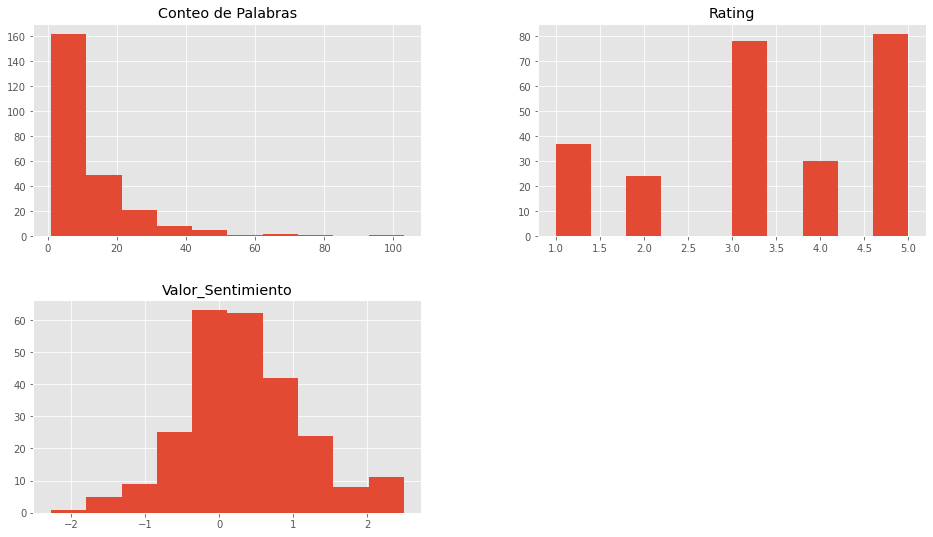

In [3]:
#Mostrar los histogramas del DataFrame
datos_df.hist();

A partir de aquí tenemos estas conclusiones:
* Para `Conteo de Palabras` es posible ver que la cantidad de palabras se centra sobre todo de 0 a 10.
* La distribución de `Rating` no está balanceada en relación a `Valor_Sentimiento`, lo cual no es bueno. 
* El histograma de `Valor_Sentimiento` parece una campana de Gauss desplazada levemente hacia la derecha del cero.

Es posible ver la cantidad de valores para cada *estrella* en la columna `Rating` empleando los métodos `.groupby()` y `.size()` de **Pandas**:

In [4]:
#Mostrar la cantidad de valores por estrellas en el DataFrame
print("El total de entradas en el DataFrame es:", datos_df.shape[0])
print("La cantidad de valores para cada estrella es:\n", datos_df.groupby('Rating').size())

El total de entradas en el DataFrame es: 250
La cantidad de valores para cada estrella es:
 Rating
1    37
2    24
3    78
4    30
5    81
dtype: int64


Es posible ver que hay mayor cantidad de *3 estrellas* y *5 estrellas*. Esto se puede mostrar de manera más representativa usando el método `.catplot()` de la librería **Seaborn**, la cual es usada para visualización estadística de datos.

#### Librería Seaborn
<img src="./Imagenes/Seaborn_Logo.png" style="width:349px;height:100px;" title="Logo ITESO">

La librería **Seaborn** para **Python** está basada en **Matplotlib**, proporciona una interfaz de alto nivel para realizar gráficos estadísticos atractivos e informativos. 

La documentación detallada de la librería **Seaborn** se puede consultar [en esta liga](https://seaborn.pydata.org).

La descripción detallada del método `.catplot()` se puede consultar [en esta liga](https://seaborn.pydata.org/generated/seaborn.catplot.html).

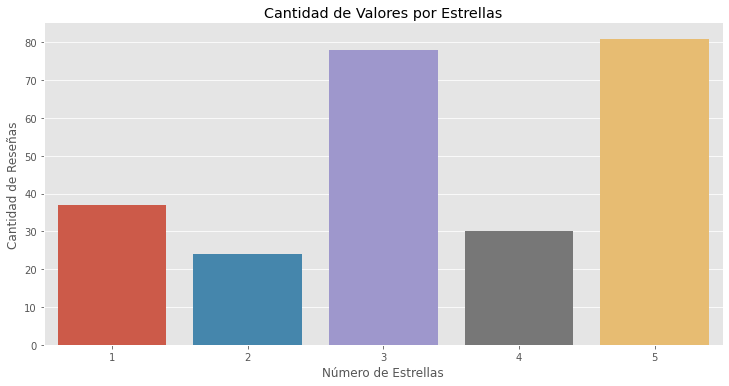

In [5]:
#Importación de librerías
import seaborn as sb

#Deshabilitar los Warnings
import warnings
warnings.filterwarnings("ignore")

#Gráfico de la columna "Rating" del DataFrame
sb.catplot('Rating', data = datos_df, kind = 'count', aspect = 2);
plt.title('Cantidad de Valores por Estrellas');
plt.xlabel('Número de Estrellas');
plt.ylabel('Cantidad de Reseñas');

Ahora se graficará la cantidad de palabras por reseña en el **DataFrame** para comprender su distribución, donde se podrá notar que la mayoría se encuentra entre 1 y 10 palabras:

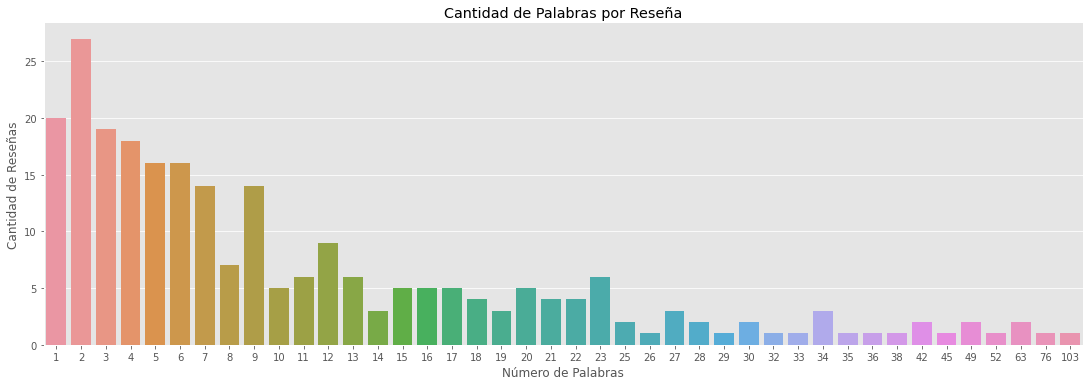

In [6]:
#Gráfico de la columna "Conteo de Palabras" del DataFrame
sb.catplot('Conteo de Palabras', data = datos_df, kind = 'count', aspect = 3);
plt.title('Cantidad de Palabras por Reseña');
plt.xlabel('Número de Palabras');
plt.ylabel('Cantidad de Reseñas');

#### Proceso de preparación de las entradas
Ahora se crearán los valores *X* y *y* de entrada, así como los sets de entrenamiento y prueba.

* El valor *X* estará definido por los valores de las columnas `Conteo de Palabras` y `Valor_Sentimiento`.
* El valor *y* estará definido por los valores de la columna `Rating`.

Para obtener los valores de entrenamiento y prueba, se empleará la función `train_test_split()` de la librería **SciKit-Learn** por medio de los siguientes pasos:

1. Los valores de entrenamiento (*train*) y de prueba (*test*) para las entradas (*X*) y las salidas (*y*) se obtienen con la función `train_test_split()` donde sus argumentos son los valores de entrada *X*, los valores de salida *y* y una función aleatoria para generarlos definida por el parámetro `random_state = 0`. 
2. Se define el proceso de normalización de los datos por medio de la función `MinMaxScaler()`.
3. Se generan los valores normalizados de entrenamiento de las entradas (*X*) por medio de la función `scaler.fit_transform()` aplicada a los valores de entrenamiento de entrada.
4. Se generan los valores normalizados de prueba de las entradas (*X*) por medio de la función `scaler.transform()` aplicada a los valores de prueba de entrada.

Esto es:

In [7]:
#Importación de librerías
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Definición de los valores X e y
X = datos_df[['Conteo de Palabras','Valor_Sentimiento']].values
y = datos_df['Rating'].values

#Definición de los valores de enrtenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Modelo k-NN con Scikit-Learn
Se definirá el valor de *k = 7*, posteriormente se podrá verificar este valor. A partir de ahí se define el clasificador con la función `KNeighborsClassifier()` de **SciKit-Learn**.

La descripción detallada de la función `KNeighborsClassifier()` se puede consultar [en esta liga](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

Para ello se realizarán los siguientes pasos:

1. Se define una variable que contiene el valor *k*.
2. Se define el modelo a partir de la función `KNeighborsClassifier()` aplicada al valor *k*.
3. Se emplea el método `.fit()` para realizar la estimación basada en un modelo lineal. 
4. Se imprimen los valores del nivel de certeza del clasificador para el entrenamiento y la prueba. 

**NOTA:** La función `KNeighborsClassifier()` de **SciKit-Learn** se aplica a valores discretos como en este ejemplo (estrellas del 1 al 5). Pero existe la función `KneighborsRegressor()` para etiquetas con valores continuos.

Esto es:

In [8]:
#Asignación del valor k
n_neighbors = 7

#Definición del Clasificador
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)

#Mostrar los valores del nivel de certeza para el entrenamiento y la prueba
print('El Nivel de Certeza del Clasificador k-NN en el set de Entrenamiento es: {:.2f}'.format(knn.score(X_train, y_train)*100),"%")
print('El Nivel de Certeza del Clasificador k-NN en el set de Prueba es: {:.2f}'.format(knn.score(X_test, y_test)*100),"%")

El Nivel de Certeza del Clasificador k-NN en el set de Entrenamiento es: 90.91 %
El Nivel de Certeza del Clasificador k-NN en el set de Prueba es: 84.13 %


### Precisión del Modelo
Se realiza la confirmación de la precisión a través de una ***Matriz de Confusión*** (función `confusion_matrix()`) y el ***Reporte*** (función `classification_report()`), ambos sobre el conjunto de prueba, esto proporciona información estadística de los aciertos y fallos.

La descripción detallada de la función `confusion_matrix` se puede consultar [en esta liga](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

La descripción detallada de la función `classification_report` se puede consultar [en esta liga](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Para ello se empleará la función `.predict()` aplicada a los datos de prueba, la cual genera los valores de predicción en base al entrenamiento realizado.

In [9]:
#Revisión de la precisión del modelo
pred = knn.predict(X_test)

#Mostrar los valores
print("Matriz de Confusión:\n", confusion_matrix(y_test, pred), "\n")
print("Reporte:\n", classification_report(y_test, pred), "\n")

Matriz de Confusión:
 [[ 9  0  1  0  0]
 [ 0  3  0  0  0]
 [ 0  0 22  1  0]
 [ 0  0  1  5  3]
 [ 0  0  4  0 14]] 

Reporte:
               precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00         3
           3       0.79      0.96      0.86        23
           4       0.83      0.56      0.67         9
           5       0.82      0.78      0.80        18

    accuracy                           0.84        63
   macro avg       0.89      0.84      0.86        63
weighted avg       0.85      0.84      0.84        63
 



A partir del ***Reporte*** se puede ver que el `f1-score` es de 84%, es una puntuación alta (valor de referencia).

Ahora se realizará la gráfica con la clasificación obtenida, la cual ayudará a ver fácilmente en donde caerán las predicciones. El modelo queda definido por la variable **clf**. 

***NOTA:*** Al ser 2 características (`Conteo de Palabras` y `Valor_Sentimiento`), se puede hacer la gráfica 2D. En caso de 3 características se puede hacer la gráfica en 3D. Pero para usos reales, se podrían tener más de 3 dimensiones, el gráfico no será representativo pero el resultado del algoritmo será el que cuente.

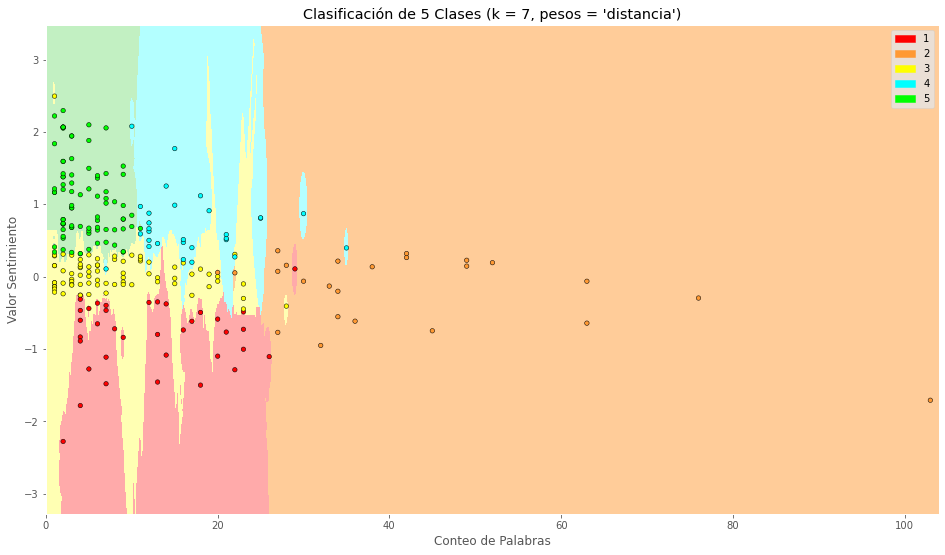

In [10]:
#Importación de librerías
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

#Valor de pasos en la malla
h = 0.02

#Creación del mapa de colores
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])

#Creación de una instancia de KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

#Gráfico de los límites de decisión, asignando un color a cada punto
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

#Colocar el resultado en un gráfico de color
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

#Gráfico de los puntos de entrenamiento
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])
plt.title("Clasificación de 5 Clases (k = %i, pesos = '%s')"% (n_neighbors, 'distancia'))
plt.xlabel('Conteo de Palabras');
plt.ylabel('Valor Sentimiento');
plt.show()

Es posible ver 5 zonas (representadas por colores) en las que se relacionan `Conteo de Palabras` y `Valor_Sentimiento` en las revisiones que dejan los usuarios. Estas pueden dividirse de la siguiente manera:
<br>
<img src="./Imagenes/knn-sectores.png" style="width:787px;height:450px;" class="center">
<br>
Esto es, que un `Conteo de Palabras` de 20 palabras y `Valor_Sentimiento` de 1 daría una valoración de 4 estrellas (zona de color azul celeste).

Con estas zonas es posible pronosticar ciertas características de los usuarios que usan y valoran la *app*:

* Los usuarios que ponen 1 estrella tienen sentimiento negativo y llegan a redactar una reseña de hasta 25 palabras.
* Los usuarios que ponen 2 estrellas dan muchas explicaciones (hasta 100 palabras) y su sentimiento puede variar entre negativo y algo positivo.
* Los usuarios que ponen 3 estrellas son bastante neutrales en sentimientos, puesto que están en torno al 0 y llegan a redactar una reseña de hasta 25 palabras.
* Los usuarios que dan 5 estrellas son bastante positivos (de 0.5 en adelante, aproximadamente) y llegan a redactar una reseña de pocas palabras (hasta 10).

#### Elección del valor de k
Se hizo la asignación de *k* como *n_neighbors = 7*, y de ello se obtuvieron buenos resultados. ***¿De donde salió ese valor?*** 

Una manera de hacerlo es a partir del sigiente código, donde se muestran distintos valores de *k* y la precisión obtenida, todo ello aplicado al los datos del **DataFrame** con el que se cuenta. 

En la gráfica es posible ver que con valores *k = 7* a *k = 14* es donde mayor precisión se logra.

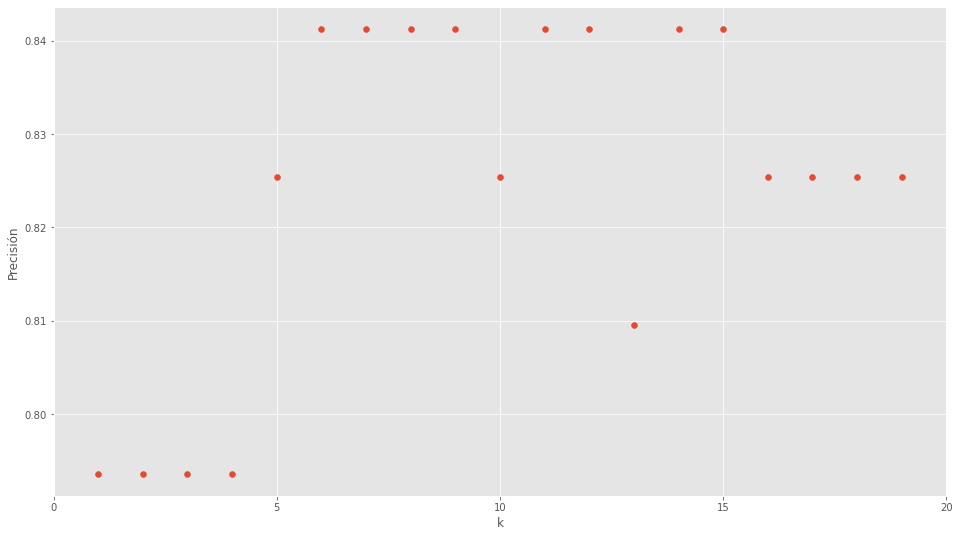

In [11]:
#Algoritmo para la elección del valor k
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure();
plt.xlabel('k');
plt.ylabel('Precisión');
plt.scatter(k_range, scores);
plt.xticks([0,5,10,15,20]);

#### Clasificar y/o predecir nuevas muestras

Ya se cuenta con el modelo y con el valor de *k*. Supongamos que llegan nuevas revisiones, se muestran dos maneras de predecir la cantidad de estrellas que recibirán.

El modelo está en **clf** y las predicciones se determinan por medio del método `.predict()`.

1. **Primer Método**: Se indica la cantidad de `Conteo de Palabras` y `Valor_Sentimiento` en los corchetes. Para este ejemplo los valores son 5 y 1.0, respectivamente, obteniendo 5 estrellas:

In [12]:
#Predicción de "Star Rating", método 1
print("El valor predecido que se obtendrá será:", clf.predict([[5, 1.0]]), "estrellas")

El valor predecido que se obtendrá será: [5] estrellas


2. **Segundo Método**: Se pueden obtener las probabilidades que de se obtengan 1, 2, 3, 4 o 5 estrellas con el método `.predict_proba()`. De igual manera, se indica la cantidad de `Conteo de Palabras` y `Valor_Sentimiento` en los corchetes. Para este ejemplo los valores son 20 y 0.0, respectivamente:

In [13]:
#Predicción de "Star Rating", método 2
print("El porcentaje de obtención de cada cantidad de estrellas será:\n", (clf.predict_proba([[20, 0.0]])*100))

El porcentaje de obtención de cada cantidad de estrellas será:
 [[ 0.38199829  2.52021225 97.09778946  0.          0.        ]]


<div class="alert alert-block alert-danger">
<b>.: Fin del Tema :.</b>
</div>